# The Discrete Logarithm Problem
To understand what Discrete Logarithm Problem (DLP) is, we first need to know what is a group. 
## Group
Let $G$ be a non-empty set and let $* : G \times G\rightarrow G$ be an operation on $G$. $G$ is a group under $*$ if  it satisfies the following axioms: 

 1. $*$ is associative
	$\forall a,b,c \in G$, $(a*b)*c = a*(b*c)$
2. Existence of identity element w.r.t $*$
	$\exists e \in G$, such that, $\forall a \in G$, $\; a*e = e*a = a$
3. Existence of inverse w.r.t $*$
	$\forall a \in G$, $\exists a^{-1} \in G$, such that, $a * a^{-1} = a^{-1}*a = e$

 If $G$ is group under the operation $*$, then this is denoted by $\langle G, * \rangle$. 
 Some examples of groups are:
 
 1. $\langle \mathbb{Z}, + \rangle$ This is the group of set of integers under the usual operation of addition.
 2.  $\langle \mathbb{Z}_n, +_n \rangle$. Here $\mathbb{Z}_n = \{ 0, 1,\dots , (n-1) \}$ where $n$ is a positive integer. $+_n$ denotes the operation of addition modulo $n$. This group is called the additive group of integers modulo $n$.
 3. $\langle \mathbb{Z}^*_n, *_n \rangle$.  $\mathbb{Z}^*_n$ is the set of positive integers which are less than $n$ and relatively prime to $n$. $*_n$ denotes the operation of multiplication modulo $n$. This group is called the multiplicative group of integers modulo $n$. $n$ is a positive integer greater than $1$.

If $G$ is a finite group, the order of $G$ is the number of elements in $G$ and is denoted by $|G|$.  If $G$ is an infinite group then $G$ is said to be a group of infinite order.
If $\langle G, * \rangle$ is a group and $g \in G$ and $k \in \mathbb{Z}$, we define $g^k$ as follows:
+  $g^k = g*g* \dots *g \; (k \; times)$ if $k>0$
+  $g^k = g^{-1}*g^{-1}* \dots *g^{-1} \; (|k| \; times)$ if $k<0$
+  $g^0 = e$

Furthermore, $G$ is called a cyclic group if every element of $G$ can be written as $g^k$, $k \in \mathbb{Z}$, for some element $g \in G$. Here, group $G$ is said to be generated by $g$ and this is denoted by $G = \langle g \rangle$. $g$ is called a generator of $G$

The order of an element $g \in G$ is the smallest positive integer $k$ such that $g^k = e$. If such a $k$ does not exist, $g$ is said to be of infinite order.
## Discrete Log Problem
Let $\langle G, * \rangle$ be a cyclic group and let $g$ be a generator of $G$. The discrete log problem states that: Given an element $x \in G$, find $k \in \mathbb{Z}$ such that $g^k = x$. $k$ is called a discrete logarithm of $x$ to the base $g$.

For example: Consider $\langle \mathbb{Z}^*_5, *_5 \rangle$. $g = 3$ is a generator of this group. Let $x=2$. The a discrete logarithm of $x$ to the base $g$ is $3$.  Discrete logarithm need not be unique.  Any integer of the from $3+4n$, $n \in \mathbb{Z}$ is a discrete logarithm of $x$ to the base $g$. Usually, a discrete logarithm of smallest magnitude is desirable.

Here we will focus only on the case where $G$ is a finite group. There are no known efficient classical algorithms to solve the discrete logarithm problem on a general group. A classical algorithm is one which runs in polynomial time in $\log |G|$.  Efficient algorithms exist for some special cases. But there exists an efficient quantum algorithm for solving discrete log problem. We will discuss this algorithm now.

## A Quantum Algorithm for DLP
Let $\langle G, * \rangle$ be a cyclic group and let $g$ be a generator of $G$. Let $|G| = N$. Let $x \in G$ be given. Our goal is to find a discrete logarithm $s$ of $x$ to the base $g$.

The algorithm is as follows:
1. Initialize three quantum registers each of size (or dimension) $D = 
\left \lceil{\log_2 N}\right \rceil$.
2. Create uniform superposition over elements of $\mathbb{Z}_N \times \mathbb{Z}_N$ in the first two registers.

	$$\frac{1}{N} \sum_{\alpha, \beta \in \mathbb{Z}_N} |\alpha \rangle |\beta \rangle |0 \rangle$$
3. Define function $f: \mathbb{Z}_N \times \mathbb{Z}_N \rightarrow G$ as follows: 

	$$f(\alpha, \beta) = x^{\alpha} g^{\beta}$$

	Let $U_f$ be the unitary transformation defined as follows:

	$$U_f |\alpha\rangle |\beta\rangle|z\rangle = |\alpha\rangle |\beta\rangle|z \oplus f(\alpha, \beta) \rangle$$
	
	Apply this $U_f$ to the current register state to get:
	
	$$\frac{1}{N} \sum_{\alpha, \beta \in \mathbb{Z}_N} |\alpha \rangle |\beta \rangle |f(\alpha, \beta) \rangle$$

4. Measure the third register.  So, the value in the third register will  be fixed, i.e., $f(\alpha, \beta) = x^{\alpha}g^{\beta} = g^{s\alpha + \beta} = g^{\gamma}$ for a fixed $\gamma \in \mathbb{Z}_N$.  So, $\alpha$ and $\beta$ values in the first two relations will satisfy the following constraint:
	
	$$s\alpha  + \beta \equiv \gamma \; (mod \; N)$$
	
	So, the state of the first two register can be written as:
	
	$$\frac{1}{\sqrt{N}} \sum_{\alpha \in \mathbb{Z}_N} |\alpha \rangle |\gamma - s\alpha  \rangle $$
	
	From here onwards, we ignore the contents of the third register.
5. Perform QFT over $\mathbb{Z}_N \times \mathbb{Z}_N$ on the first two registers. This gives:	
	
	$$\frac{1}{N\sqrt{N}} \sum_{\alpha, u, v \in \mathbb{Z}_N} \omega_N^{u\alpha + (\gamma - s \alpha)v} |u \rangle |v  \rangle $$
	
	$$=\frac{1}{N\sqrt{N}} \sum_{ u, v \in \mathbb{Z}_N} \omega_N^{\gamma v} \sum_{\alpha \in \mathbb{Z}_N} \omega_N^{(u-sv)} |u \rangle |v  \rangle $$
	
	$$=\frac{1}{\sqrt{N}} \sum_{ u, v \in \mathbb{Z}_N} \omega_N^{\gamma v} |sv \rangle |v  \rangle $$

6. Measure the first two registers to obtain some pair $(sv, v)$ for some uniformly random $v$ in $\mathbb{Z}_N$. We want $v \neq 0$. This will be the case with high probability. Repeat the algorithm to obtain another pair $(sv', v')$ such that $v$ and $v'$ are relatively prime. It can be shown that with probability $\frac{6}{\pi^2} \approx 0.61$ this will be the case. Now, since $v$ and $v'$ are relatively prime, we can find integers $\lambda$ and $\lambda'$ such that $\lambda v + \lambda' v' =1$. So, we can find as follows:

	$$s = \lambda(sv) + \lambda' (sv')$$
	
If $U_f$ and the circuit for QFT can be implemented in polynomial number of gates in $\log |G|$, the algorithm can be made to run in time proportional to polynomial in $\log |G|$.

Here, we present a code for discrete log problem on $\mathbb{Z}^*_p$ where $p$ is a prime of the form $2^n +1$ where $n \in \mathbb{Z}^+$. This specific choice is taken because in this case the order of the group will be $p-1 = 2^n$ which is a power of two. So, the circuit for QFT can be implemented efficiently i.e. in $\mathcal{O}(n^2)$ gates.

Here, $U_f$ is not implemented efficiently. Because of this even for $n=4$, the code will take very long time to run. In our code, we take $n=2$, $g=3$ and $x=2$. The code will work for other values too provided $n$ is small.

Now, we go through the code. In each cell, we will try to explain what is being done in the following cell of the code and it corresponds to which step in the above algorithm.


In [0]:
#!pip install qiskit
import numpy as np
from qiskit import(
  QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator

Following 2 cells are used to create the matrix for the unitary transformation $U_f$ as described in the tutorial in the beginning. There are $8^n$ possible inputs which is mapped to a particular output which can be shown using a matrix of dimension $8^n \times 8^n$. Output requires computing $f(\alpha, \beta) = x^{\alpha} g^{\beta}$ which can be done using fast modular exponentiation.

In [0]:
def mod_exp(x,e,m):
    X = x
    E = e
    Y = 1
    while E > 0:
        if E % 2 == 0:
            X = (X * X) % m
            E = E/2
        else:
            Y = (X * Y) % m
            E = E - 1
    return Y

In [0]:
def create_Uf(N,x,g):
    p = N + 1
    M = N*N*N
    mat = np.zeros((M,M))
    for a in range(N):
        for b in range(N):
            for y in range(N):
                id1 = y + N*b + N*N*a
                c = (mod_exp(x,a,p)*mod_exp(g,b,p))%p - 1
                c ^= y
                id2 = c + N*b + N*N*a
                mat[id2][id1]=1
    return mat.astype(int).tolist()            

In [0]:
# This code has been taken from https://rosettacode.org/wiki/Miller%E2%80%93Rabin_primality_test#Python
# It is used to check if the order of the group is prime or not
def _try_composite(a, d, n, s):
    if pow(a, d, n) == 1:
        return False
    for i in range(s):
        if pow(a, 2**i * d, n) == n-1:
            return False
    return True # n  is definitely composite
 
def is_prime(n, _precision_for_huge_n=16):
    if n in _known_primes:
        return True
    if any((n % p) == 0 for p in _known_primes) or n in (0, 1):
        return False
    d, s = n - 1, 0
    while not d % 2:
        d, s = d >> 1, s + 1
    # Returns exact according to http://primes.utm.edu/prove/prove2_3.html
    if n < 1373653: 
        return not any(_try_composite(a, d, n, s) for a in (2, 3))
    if n < 25326001: 
        return not any(_try_composite(a, d, n, s) for a in (2, 3, 5))
    if n < 118670087467: 
        if n == 3215031751: 
            return False
        return not any(_try_composite(a, d, n, s) for a in (2, 3, 5, 7))
    if n < 2152302898747: 
        return not any(_try_composite(a, d, n, s) for a in (2, 3, 5, 7, 11))
    if n < 3474749660383: 
        return not any(_try_composite(a, d, n, s) for a in (2, 3, 5, 7, 11, 13))
    if n < 341550071728321: 
        return not any(_try_composite(a, d, n, s) for a in (2, 3, 5, 7, 11, 13, 17))
    # otherwise
    return not any(_try_composite(a, d, n, s) 
                   for a in _known_primes[:_precision_for_huge_n])
 
_known_primes = [2, 3]
_known_primes += [x for x in range(5, 1000, 2) if is_prime(x)]

In [0]:
# This function is used to check if g is the generator of the group or not
def check_generator(g,n,N):
  x = g
  if x==1:
    return False
  for i in range(1,n):
    x = (x * x)%(N+1)
    if x==1:
      return False
  return True

The inputs $n, g$ and $x$ can be provided in the below cell. Their meanings are same as described in the tutorial.

In [0]:
simulator = Aer.get_backend('qasm_simulator')
n = 2
N = int(2**n)
g = 3
x = 2

if not is_prime(N+1):
  print('Order of group is not prime')
  #quit()

if not check_generator(g,n,N):
  print('g is not a generator')
  #quit()

The below cell corresponds to the first step of the algorithm. In our case $D=n$ because $|G|=2^n$. The classical registers will be useful later on for measurement.

In [0]:
q = QuantumRegister(3*n, 'q')
c = ClassicalRegister(3*n, 'c')
circuit = QuantumCircuit(q,c)

The below cell corresponds to the second step of the algorithm. The Hadamard operators create uniform superposition over the first two registers.

In [29]:
circuit.h(q[n:3*n])
circuit.draw()

The below cell corresponds to the third step of the algorithm. The $Operator()$ function creates the circuit corresponding to the matrix created above for the $U_f$ operator. 

In [30]:
Uf = Operator(create_Uf(N,x,g))
circuit.unitary(Uf,np.arange(0,3*n,1).tolist(),label='Uf')
circuit.draw()

This is the fourth step of the algorithm. 

In [31]:
circuit.measure(q[:n],c[:n])

The following 2 cells describe the fifth step of the algorithm. The below function creates circuit for QFT over $\mathbb{Z}_{2^n}$.

In [0]:
def nBitQFT(circuit,n,q):
    for k in range(n):
        j = n - k
        circuit.h(q[j-1])
        for i in reversed(range(j-1)):
            circuit.cu1(2*np.pi/2**(j-i),q[i], q[j-1])
    for i in range(n//2):
        circuit.swap(q[i], q[n-i-1])

In [33]:
nBitQFT(circuit,n,q[n:2*n])
nBitQFT(circuit,n,q[2*n:3*n])
circuit.measure(q[n:3*n],c[n:3*n])
circuit.draw()

The below cell performs the simulation of the entire algorithm $1024$ times. The histogram below shows the probability distribution of the output of $3$ registers. One can verify that the first two registers are indeed of the form $|sv\rangle|v\rangle$ where $v \in \mathbb{Z}_{2^n}$. For default values $s=3$. One can also choose $2$ outputs of the simulation such that both of them have the same value in the third register and coprime values in the second register and perform the sixth step of the tutorial to get the value of $s$. 

{'101010': 53, '101001': 62, '000000': 64, '011101': 77, '000010': 70, '101011': 63, '000001': 65, '110100': 68, '011110': 65, '011111': 59, '110111': 64, '101000': 54, '110110': 77, '000011': 67, '011100': 57, '110101': 59}


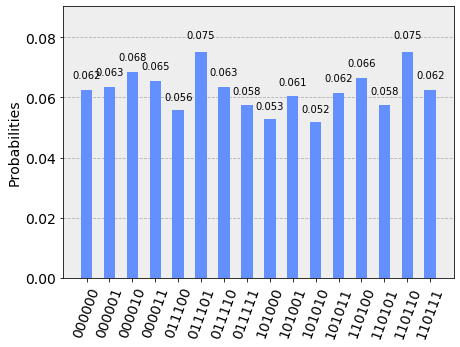

In [34]:
job = execute(circuit, simulator, shots=1024)

result = job.result()
counts = result.get_counts(circuit)
print(counts)

plot_histogram(counts)